<a href="https://colab.research.google.com/github/TAPASSINGH0075/nodemfy/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving traffic.csv to traffic (2).csv
Saving weather.csv to weather (1).csv


In [ ]:
print(traffic_data.head())
print(weather_data.head())
print(combined_data.head())


             DateTime  vechiles
0 2023-01-01 00:00:00       120
1 2023-01-01 01:00:00        80
2 2023-01-01 02:00:00        45
3 2023-01-01 03:00:00        30
4 2023-01-01 04:00:00        25
             DateTime  Temp_C  Dew point Temp_C  Rel Hum_%  \
0 2023-01-01 00:00:00      -5                -8         85   
1 2023-01-01 01:00:00      -6                -9         88   
2 2023-01-01 02:00:00      -7               -10         90   
3 2023-01-01 03:00:00      -8               -11         92   
4 2023-01-01 04:00:00      -8               -11         91   

   weather Speed_km/h  visibility_km  Press_kPa weather  
0                  10            2.0      101.2    Snow  
1                  12            1.5      101.1    Snow  
2                   8            1.0      101.0     Fog  
3                   6            0.8      100.9     Fog  
4                   5            1.0      100.8     Fog  
             datetime  vechiles  temp_c  dew_point_temp_c  rel_hum_%  \
0 2023-01-01 00

<ipython-input-3-7295b0932dad>:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  traffic_data['DateTime'] = traffic_data['DateTime'].dt.floor('H')
<ipython-input-3-7295b0932dad>:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data['DateTime'] = weather_data['DateTime'].dt.floor('H')
<ipython-input-3-7295b0932dad>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


XGBoost Mean Squared Error: 60.25


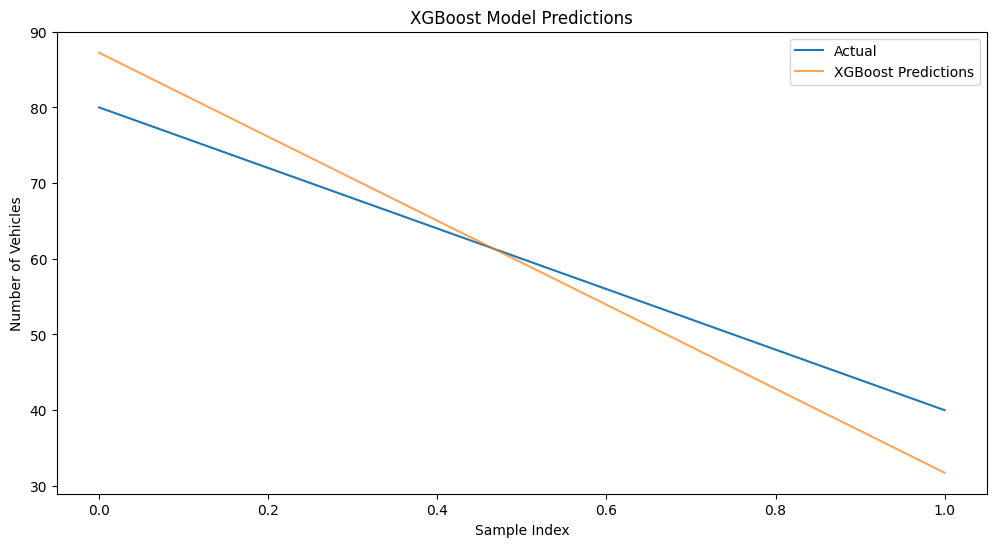

Random Forest Mean Squared Error: 108.86


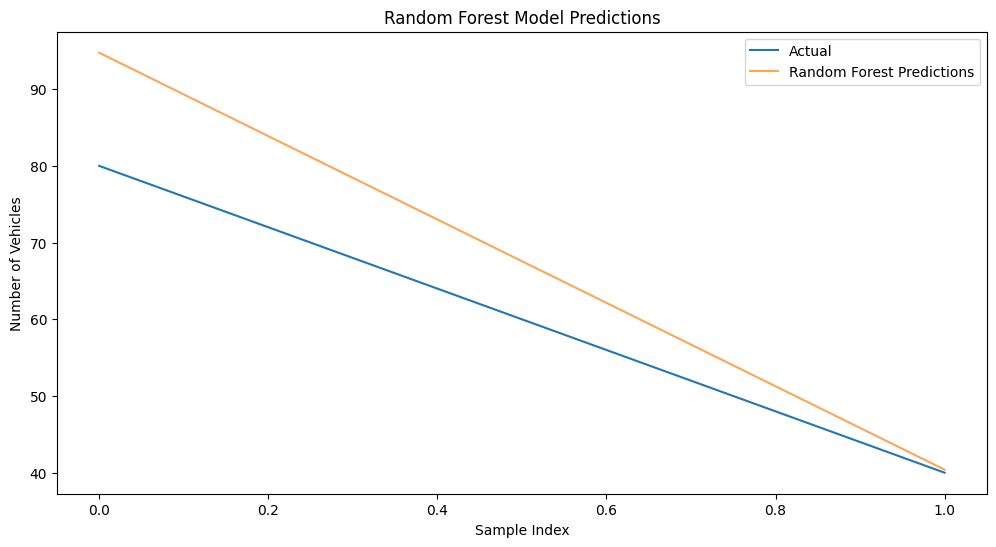

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

ARIMA Mean Squared Error: 4305.97


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


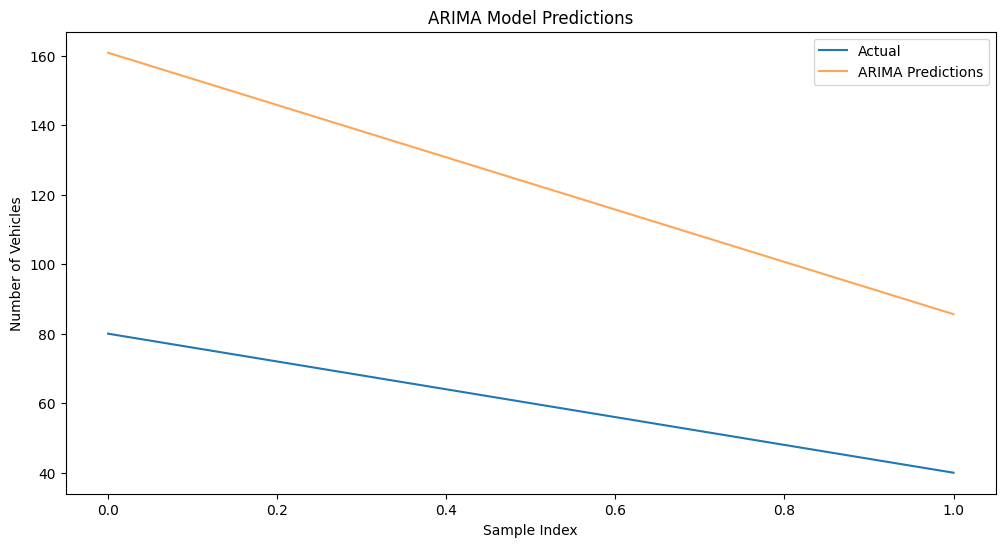

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

# 2. Load Uploaded Data
traffic_data = pd.read_csv('traffic.csv')
weather_data = pd.read_csv('weather.csv')

# 3. Preprocess Data
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
weather_data['DateTime'] = pd.to_datetime(weather_data['DateTime'])

traffic_data['DateTime'] = traffic_data['DateTime'].dt.floor('H')
weather_data['DateTime'] = weather_data['DateTime'].dt.floor('H')

combined_data = pd.merge(traffic_data, weather_data, on='DateTime')
combined_data.fillna(method='ffill', inplace=True)

combined_data['hour'] = combined_data['DateTime'].dt.hour
combined_data['day_of_week'] = combined_data['DateTime'].dt.dayofweek

# Normalize column names
combined_data.columns = [col.strip().lower().replace(" ", "_") for col in combined_data.columns]

# Encode weather
if 'weather' in combined_data.columns:
    label_encoder = LabelEncoder()
    combined_data['weather'] = label_encoder.fit_transform(combined_data['weather'])

# Clean target column
combined_data['vechiles'] = pd.to_numeric(combined_data['vechiles'], errors='coerce')
combined_data.dropna(subset=['vechiles'], inplace=True)

# Define features and target
features = ['hour', 'day_of_week', 'temp_c', 'dew_point_temp_c',
            'rel_hum_%', 'weather_speed_km/h', 'visibility_km', 'press_kpa', 'weather']
X = combined_data[features]
y = combined_data['vechiles']

# 4. Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_xgb, label='XGBoost Predictions', alpha=0.7)
plt.title('XGBoost Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# 6. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Random Forest Predictions', alpha=0.7)
plt.title('Random Forest Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# 7. ARIMA Model
y_train_series = pd.Series(y_train.values, index=combined_data.iloc[y_train.index]['datetime'])

model_arima = ARIMA(y_train_series, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

forecast_arima = model_arima_fit.forecast(steps=len(y_test))
mse_arima = mean_squared_error(y_test, forecast_arima)
print(f"ARIMA Mean Squared Error: {mse_arima:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(forecast_arima.values, label='ARIMA Predictions', alpha=0.7)
plt.title('ARIMA Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()
